In [7]:
import cv2
import openface
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas
from sklearn import svm
from joblib import dump, load

In [8]:
# TRAINING ------------------------
# TRAINING THE SVM FROM PREVIUOUSLY CALCULATED EMBEDDINGS
df = pandas.read_csv("/home/amine/ml/imageclassification/results/reps.csv", header=None) # Training data 
lf = pandas.read_csv("/home/amine/ml/imageclassification/results/labels.csv", header=None) # Training Labels
lf_to_list = lf[0].tolist() # Flat training labels
clf = svm.LinearSVC()
clf.fit(df.values, lf_to_list)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [10]:
#We save the trained model for ture use for inference
dump(clf, 'virgin_trained_model.joblib')

['virgin_trained_model.joblib']

In [11]:
# INFERENCE ------------------------
# WE LOAD THE FACENET NETWORK
network_model = "/home/amine/ml/imageclassification/openface/models/openface/nn4.small2.v1.t7"
net = openface.TorchNeuralNet(network_model, 96)

In [12]:
# WE OPEN THE IMAGE TO PREDICT AND CALCULATE THE FACE EMBEDDINGS
img_path = "/home/amine/ml/imageclassification/treated_no_training/no_richard"
img_name = "187_2.png"
full_img_path = f"{img_path}/{img_name}"
image = cv2.imread(full_img_path)
rep = net.forward(image)

# We load the previously saved model 
clf2 = load('virgin_trained_model.joblib')
# WE RUN THE EMBEDDING IN THE TRAINBED SVM AND SEE THE RESULT 
clf2.predict([rep])[0]

2

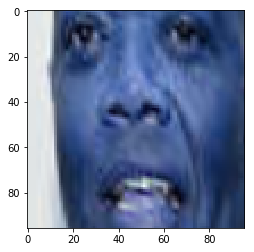

In [13]:
img = mpimg.imread(full_img_path)
plt.imshow(img)